<a href="https://colab.research.google.com/github/Shivank-sudo/My-DS-Portfolio/blob/Module-2-Machine-Learning/Copy_of_M2_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [3]:
# YOUR CODE HERE
df= pd.read_csv('Online_Retail_Train.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [4]:
customer_train_df= df.copy()
customer_train_df.shape

(514813, 8)

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [5]:
customer_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [6]:
#Check for redundant data.
customer_train_df.duplicated().sum()

4754

In [7]:
#Dropping the duplicate rows
customer_train_df= customer_train_df.drop_duplicates()
customer_train_df.duplicated().sum()

0

In [8]:
customer_train_df.shape

(510059, 8)

In [9]:
#Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action
adjusted_rows = customer_train_df[customer_train_df['InvoiceNo'].str.startswith('A')]
cancelled_rows = customer_train_df[customer_train_df['InvoiceNo'].str.startswith('C')]

adjusted_rows.shape, cancelled_rows.shape

((3, 8), (8763, 8))

In [10]:
customer_train_df = customer_train_df.drop(adjusted_rows.index)
customer_train_df = customer_train_df.drop(cancelled_rows.index)
customer_train_df.shape

(501293, 8)

In [11]:
negative_quantity_rows= customer_train_df[customer_train_df['Quantity'] < 1]
negative_quantity_rows.shape

(1287, 8)

In [12]:
customer_train_df = customer_train_df.drop(negative_quantity_rows.index)

In [13]:
customer_train_df.shape

(500006, 8)

In [14]:
#Handle the null values by dropping or filling with appropriate mean
customer_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500006 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    500006 non-null  object 
 1   StockCode    500006 non-null  object 
 2   Description  499452 non-null  object 
 3   Quantity     500006 non-null  int64  
 4   InvoiceDate  500006 non-null  object 
 5   UnitPrice    500006 non-null  float64
 6   CustomerID   373434 non-null  float64
 7   Country      500006 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.3+ MB


In [15]:
customer_train_df['CustomerID'].fillna(value= int(customer_train_df['CustomerID'].mean()), inplace= True)
customer_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500006 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    500006 non-null  object 
 1   StockCode    500006 non-null  object 
 2   Description  499452 non-null  object 
 3   Quantity     500006 non-null  int64  
 4   InvoiceDate  500006 non-null  object 
 5   UnitPrice    500006 non-null  float64
 6   CustomerID   500006 non-null  float64
 7   Country      500006 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.3+ MB


<ipython-input-15-2c197fb95998>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_train_df['CustomerID'].fillna(value= int(customer_train_df['CustomerID'].mean()), inplace= True)


In [16]:
#Checking The transaction with 'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES' as their StockCodes are considered as irrelevant transactions.
irrelavant_transactions= customer_train_df[customer_train_df['StockCode'].isin(['POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'])]
irrelavant_transactions.shape

(0, 8)

In [17]:
customer_train_df.describe()

,Quantity,UnitPrice,CustomerID
count,500006.000000,500006.000000,500006.000000
mean,10.750131,3.869468,15289.280585
std,161.405633,27.033079,1480.868202
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,14383.000000
50%,4.000000,2.080000,15289.000000
75%,11.000000,4.130000,16244.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
numerical_features=[]
categorical_features=[]
for col in customer_train_df.columns:
  if customer_train_df[col].dtype=='object':
    categorical_features.append(col)
  else:
    numerical_features.append(col)
print('Categorical features: ', categorical_features)
print('Numerical features: ', numerical_features)

Categorical features:  ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
Numerical features:  ['Quantity', 'UnitPrice', 'CustomerID']


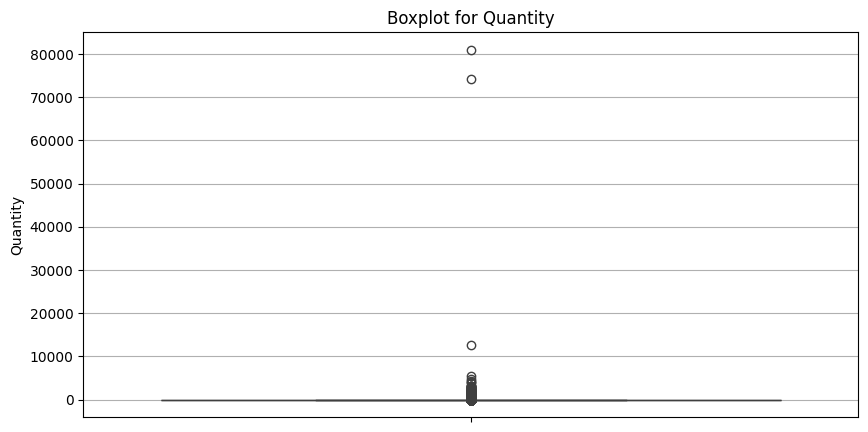

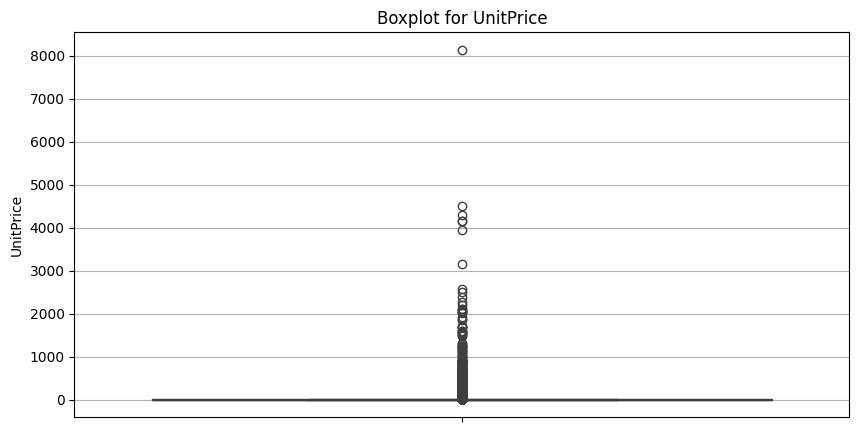

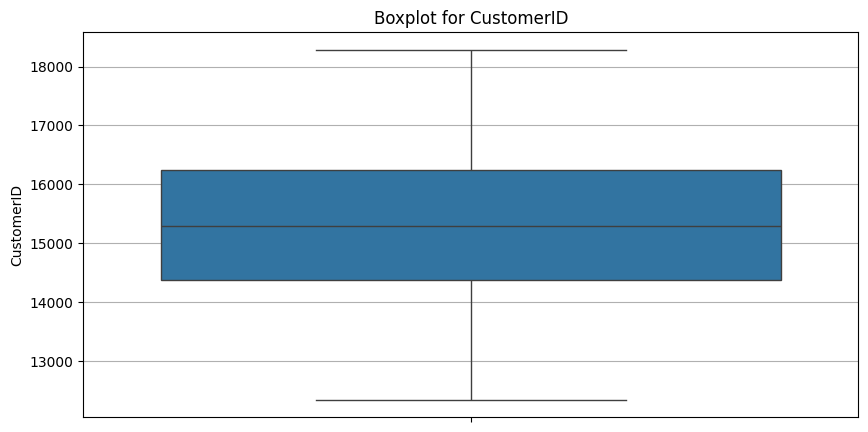

In [19]:
#Checking for outliers
# YOUR CODE HERE
for feature in numerical_features:
  plt.figure(figsize=(10,5))
  sns.boxplot(customer_train_df[feature])
  plt.grid(axis='y')
  plt.title(f'Boxplot for {feature}')
  plt.ylabel(feature)
  plt.show()

In [20]:
#Handling outliers
def handle_outliers(df, numerical_features):
  outlier_summary={}
  customer_cleaned_df= df.copy()

#finding IQR
  for feature in numerical_features:
    Q1= customer_cleaned_df[feature].quantile(0.25)
    Q3= customer_cleaned_df[feature].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR

    outlier_rows= customer_cleaned_df[(customer_cleaned_df[feature]<lower_bound) | (customer_cleaned_df[feature]>upper_bound)]
    outlier_summary[feature]= {
        "lower bound": lower_bound,
        "upper bound": upper_bound,
        "outlier count": outlier_rows.shape[0]
    }

    customer_cleaned_df[feature]= df[feature].clip(lower= lower_bound, upper= upper_bound)

  return customer_cleaned_df, outlier_summary








In [21]:
customer_train_cleaned_df, outlier_summary= handle_outliers(customer_train_df, numerical_features)
outlier_summary_table= pd.DataFrame(outlier_summary).T
outlier_summary_table

,lower bound,upper bound,outlier count
Quantity,-14.00,26.00,25972.0
UnitPrice,-3.07,8.45,35904.0
CustomerID,11591.50,19035.50,0.0


In [22]:
customer_train_cleaned_df.shape

(500006, 8)

In [23]:
# Recheck for outliers
# YOUR CODE HERE
def recheck_outliers(customer_cleaned_df, numerical_features):
  remaining_outliers= {}

  for feature in numerical_features:

    Q1 = customer_cleaned_df[feature].quantile(0.25)
    Q3 = customer_cleaned_df[feature].quantile(0.75)
    IQR= Q3- Q1

    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    # Count remaining outliers
    outliers_count= customer_cleaned_df[(customer_cleaned_df[feature]< lower_bound) | (customer_cleaned_df[feature]> upper_bound)].shape[0]
    remaining_outliers[feature] = outliers_count

  return remaining_outliers

In [24]:
remaining_outliers = recheck_outliers(customer_train_cleaned_df, numerical_features)
remaining_outliers_df = pd.DataFrame.from_dict(remaining_outliers, orient= 'index', columns= ['Remaining Outliers'])
remaining_outliers_df

,Remaining Outliers
Quantity,0
UnitPrice,0
CustomerID,0


In [25]:
#Create a DayOfWeek column using InvoiceDate
customer_train_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.45,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,15289.0,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom


In [26]:
customer_train_cleaned_df['DayOfWeek']= pd.to_datetime(customer_train_cleaned_df['InvoiceDate']).dt.dayofweek
customer_train_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.45,16479.0,United Kingdom,1
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,6
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,15289.0,United Kingdom,1
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2


In [27]:
#Perform all the above operations using a function to reuse and apply the same for test data.
customer_test_df= pd.read_csv('Online_Retail_Test.csv')
customer_test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [28]:
def data_cleaning(df):
  #Check for redundant data.
  customer_test_df= df.copy()
  print('duplicate rows: ',customer_test_df.duplicated().sum())

  #Dropping the duplicate rows
  customer_test_df= customer_test_df.drop_duplicates()
  print('duplicate rows after dropping: ',customer_test_df.duplicated().sum())

  #Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action
  adjusted_rows = customer_test_df[customer_test_df['InvoiceNo'].str.startswith('A')]
  cancelled_rows = customer_test_df[customer_test_df['InvoiceNo'].str.startswith('C')]


  print('adjusted rows: ',adjusted_rows.shape)
  print('cancelled rows: ',cancelled_rows.shape)

  customer_test_df = customer_test_df.drop(adjusted_rows.index)
  customer_test_df = customer_test_df.drop(cancelled_rows.index)
  negative_quantity_rows = customer_test_df[customer_test_df['Quantity'] < 1]
  print('negative quantity rows: ',negative_quantity_rows.shape)
  customer_test_df = customer_test_df.drop(negative_quantity_rows.index)
  print('customer test dataframe shape after dropping cancelled, negative quantity & adjusted transactions: ',customer_test_df.shape)

  customer_test_df['CustomerID'].fillna(value= int(customer_test_df['CustomerID'].mean()), inplace= True)

  #Checking The transaction with 'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES' as their StockCodes are considered as irrelevant transactions.
  irrelavant_transactions= customer_test_df[customer_test_df['StockCode'].isin(['POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'])]

  numerical_features=[]
  categorical_features=[]
  for col in customer_test_df.columns:
    if customer_train_df[col].dtype=='object':
      categorical_features.append(col)
    else:
      numerical_features.append(col)
  print('Categorical features: ', categorical_features)
  print('Numerical features: ', numerical_features)

  #Checking for outliers
  # YOUR CODE HERE
  for feature in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(customer_test_df[feature])
    plt.grid(axis='y')
    plt.title(f'Boxplot for {feature}')
    plt.ylabel(feature)
    plt.show()

  #Handling outliers
  customer_test_cleaned_df, outlier_summary= handle_outliers(customer_test_df, numerical_features)
  outlier_summary_table= pd.DataFrame(outlier_summary).T
  print(outlier_summary_table)

  remaining_outliers = recheck_outliers(customer_test_cleaned_df, numerical_features)
  remaining_outliers_df = pd.DataFrame.from_dict(remaining_outliers, orient= 'index', columns= ['Remaining Outliers'])
  print(remaining_outliers_df)

  customer_test_cleaned_df['DayOfWeek']= pd.to_datetime(customer_test_cleaned_df['InvoiceDate']).dt.dayofweek

  return customer_test_cleaned_df

duplicate rows:  14
duplicate rows after dropping:  0
adjusted rows:  (0, 8)
cancelled rows:  (491, 8)
negative quantity rows:  (49, 8)
customer test dataframe shape after dropping cancelled, negative quantity & adjusted transactions:  (26542, 8)
Categorical features:  ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
Numerical features:  ['Quantity', 'UnitPrice', 'CustomerID']


<ipython-input-28-8e185720dfd3>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_test_df['CustomerID'].fillna(value= int(customer_test_df['CustomerID'].mean()), inplace= True)


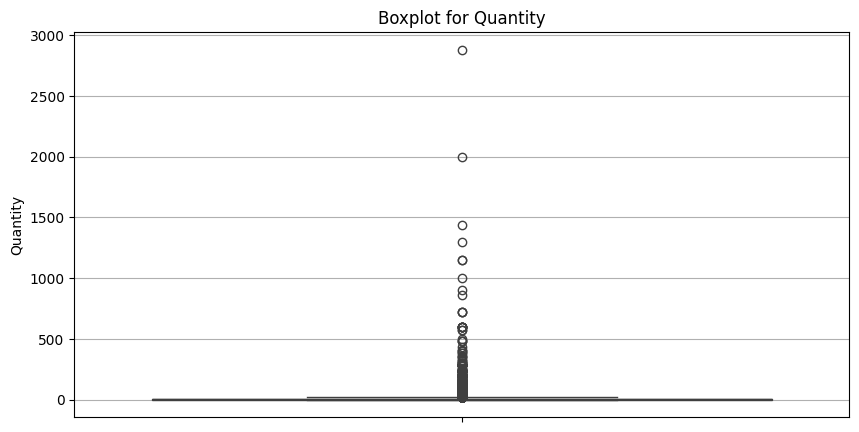

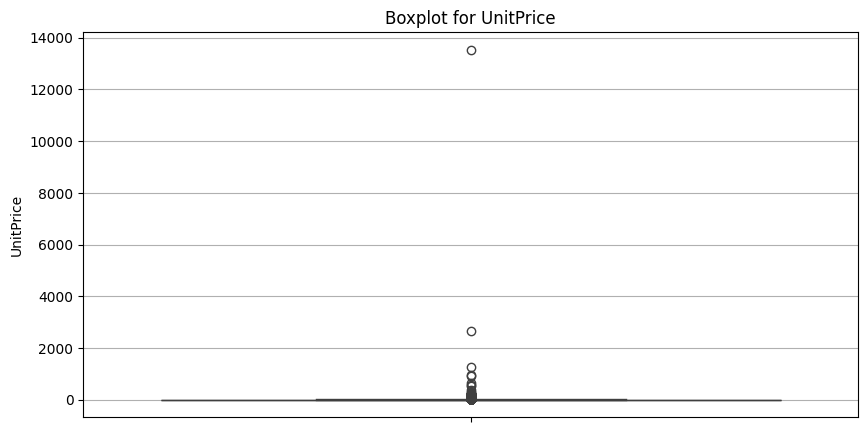

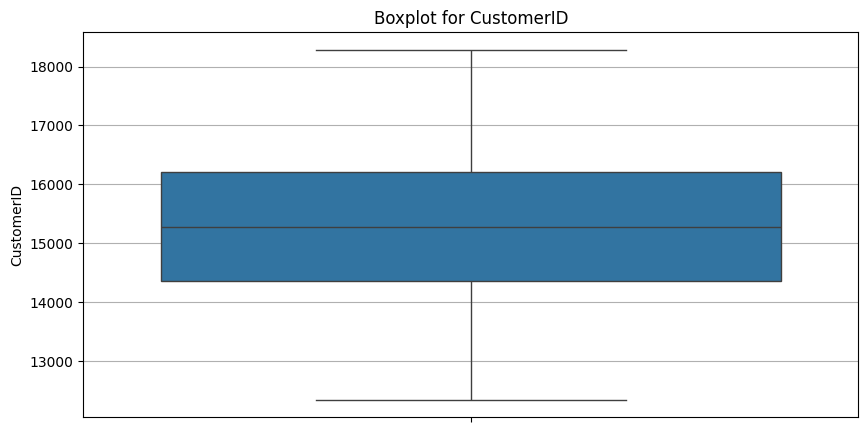

            lower bound  upper bound  outlier count
Quantity         -12.50        23.50         2814.0
UnitPrice         -3.07         8.45         1935.0
CustomerID     11588.00     18980.00            0.0
            Remaining Outliers
Quantity                     0
UnitPrice                    0
CustomerID                   0


In [29]:
customer_test_cleaned_df= data_cleaning(customer_test_df)

In [30]:
customer_test_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,23.5,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2
1,554974,21128,GOLD FISHING GNOME,4.0,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,4
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4.0,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,3
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3.0,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2
4,546157,22180,RETROSPOT LAMP,2.0,2011-03-10 08:40:00,8.45,13502.0,United Kingdom,3


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [31]:
free_items= customer_train_cleaned_df[customer_train_cleaned_df['UnitPrice']==0].shape[0]
print('count of free items: ',free_items)

count of free items:  1110


Country
United Kingdom          18663
Germany                   457
France                    392
EIRE                      288
Belgium                    98
Netherlands                94
Spain                      90
Portugal                   58
Australia                  57
Switzerland                54
Finland                    41
Italy                      37
Norway                     36
Sweden                     36
Channel Islands            26
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                13
Hong Kong                  10
Israel                      8
Iceland                     7
Singapore                   7
Canada                      6
USA                         5
Malta                       5
Greece                      5
European Community          4
Lithuania                   4
Bahrain                     3
United Arab Emirates        3
Cz

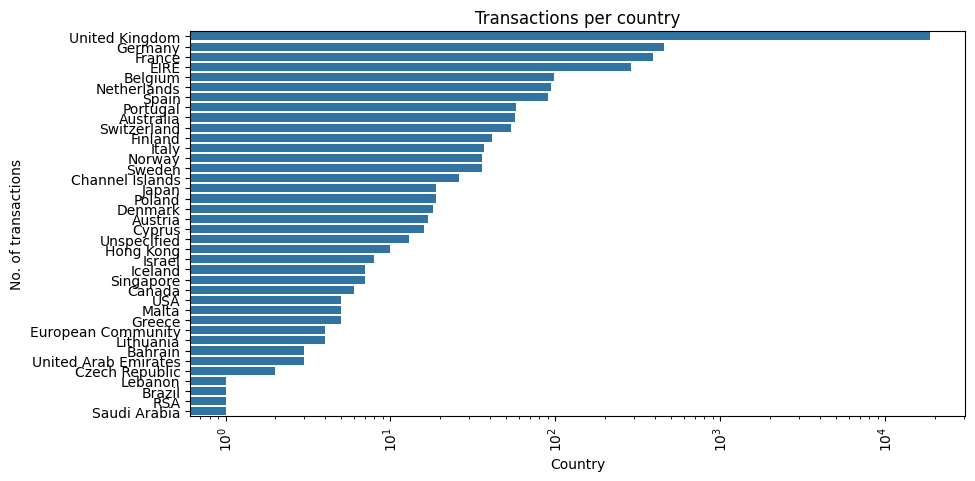

In [32]:
# YOUR CODE HERE
transactions_per_country= customer_train_cleaned_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending= False)
print(transactions_per_country)
plt.figure(figsize=(10,5))
sns.barplot(x=transactions_per_country.values, y= transactions_per_country.index)
plt.xscale('log')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('No. of transactions')
plt.title('Transactions per country')
plt.show()

In [33]:
transactions_per_country.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Netherlands',
       'Spain', 'Portugal', 'Australia', 'Switzerland', 'Finland', 'Italy',
       'Norway', 'Sweden', 'Channel Islands', 'Japan', 'Poland', 'Denmark',
       'Austria', 'Cyprus', 'Unspecified', 'Hong Kong', 'Israel', 'Iceland',
       'Singapore', 'Canada', 'USA', 'Malta', 'Greece', 'European Community',
       'Lithuania', 'Bahrain', 'United Arab Emirates', 'Czech Republic',
       'Lebanon', 'Brazil', 'RSA', 'Saudi Arabia'],
      dtype='object', name='Country')

In [34]:
transactions_per_country.values

array([18663,   457,   392,   288,    98,    94,    90,    58,    57,
          54,    41,    37,    36,    36,    26,    19,    19,    18,
          17,    16,    13,    10,     8,     7,     7,     6,     5,
           5,     5,     4,     4,     3,     3,     2,     1,     1,
           1,     1])

In [35]:
purchasers_frequency= customer_train_cleaned_df.groupby('CustomerID')['InvoiceNo'].nunique()
purchasers_frequency.head()

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [36]:
type(purchasers_frequency)

pandas.core.series.Series

In [37]:
purchasers_frequency.shape

(4337,)

In [38]:
single_time_purchasers= purchasers_frequency[purchasers_frequency==1].value_counts().sum()
print('Single Time Purchasers: ', single_time_purchasers)

repeated_purchasers= purchasers_frequency[purchasers_frequency>1].value_counts().sum()
print('Repeated Purchasers: ', repeated_purchasers)
ser= pd.Series([single_time_purchasers/len(purchasers_frequency), repeated_purchasers/len(purchasers_frequency)], index= ['Single Time Purchasers', 'Repeated Purchasers'])
print(ser)


print('Ratio of single time purchasers vs repeated purchasers: ', single_time_purchasers/repeated_purchasers)

Single Time Purchasers:  1498
Repeated Purchasers:  2839
Single Time Purchasers    0.3454
Repeated Purchasers       0.6546
dtype: float64
Ratio of single time purchasers vs repeated purchasers:  0.5276505811905601


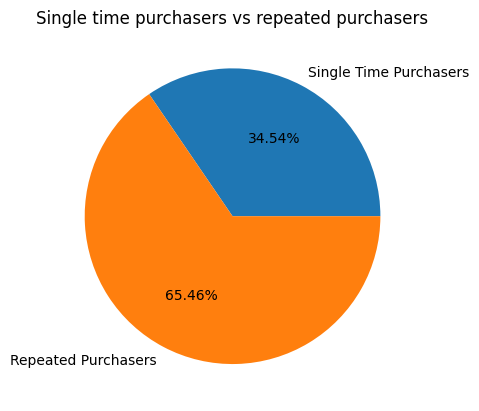

In [39]:
ser.plot(kind='pie',autopct='%.2f%%').set_ylabel('')
plt.title('Single time purchasers vs repeated purchasers')
plt.show()

In [40]:
customer_train_cleaned_df['Month']= pd.to_datetime(customer_train_cleaned_df['InvoiceDate']).dt.month_name()
customer_train_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Month
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.45,16479.0,United Kingdom,1,November
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,6,May
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0,November
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,15289.0,United Kingdom,1,March
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2,November


<ipython-input-41-3249844ccdea>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Unit Price')


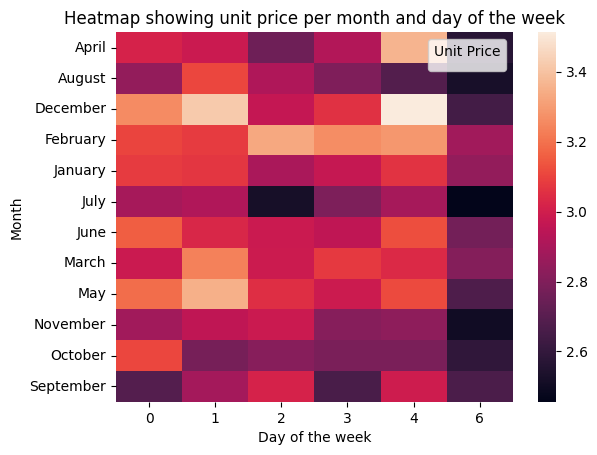

In [41]:
sns.heatmap(customer_train_cleaned_df.pivot_table(index='Month', columns= 'DayOfWeek', values= 'UnitPrice', aggfunc='mean' ))
plt.xlabel('Day of the week')
plt.ylabel('Month')
plt.legend(title='Unit Price')
plt.title('Heatmap showing unit price per month and day of the week')
plt.show()


In [42]:
top_ten_customers= customer_train_cleaned_df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending= False).head(10)
print('Top 10 customers: ',top_ten_customers)

top_ten_itmes= customer_train_cleaned_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending= False).head(10)
print('Top 10 items: ',top_ten_itmes)

Top 10 customers:  CustomerID
15289.0    356135
14911.0     58735
14646.0     43598
14298.0     31304
13089.0     24297
17511.0     20832
17841.0     20160
14156.0     18544
12748.0     17846
15311.0     16358
Name: Quantity, dtype: int64
Top 10 items:  StockCode
85099B    20608
84879     19934
85123A    19789
21212     18975
22197     17486
20725     13451
22178     12608
84077     11804
47566     11767
84946     11550
Name: Quantity, dtype: int64


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [43]:
# YOUR CODE HERE
customer_train_cleaned_df['Total Amount Spent']= customer_train_cleaned_df['Quantity']*customer_train_cleaned_df['UnitPrice']
customer_train_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Month,Total Amount Spent
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.45,16479.0,United Kingdom,1,November,16.90
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,6,May,10.08
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0,November,2.52
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,15289.0,United Kingdom,1,March,7.46
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,2,November,15.60


Note that DayOfWeek is a categorical feature and K-Means being a distance based algorithm does not apply well on categorical variables. The recommended way to convert days of week (cyclical feature) to a numerical encoding is to use a trigonometric transformation, as shown here. We will use the same below.

In [ ]:
def transformation(column):
  max_value = column.max()
  sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
  cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]

  return sin_values, cos_values


def feature_engineering(df):
  df_grouped= df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Total Amount Spent': 'sum'}).reset_index()
    # maximum visits on day of week by each customer
  df_grouped['DayOfWeek']= df.groupby('CustomerID')['DayOfWeek'].agg('max').reset_index()['DayOfWeek']
  df_grouped['DayOfWeekSin'], df_grouped['DayOfWeekCos']= transformation(df_grouped['DayOfWeek'].values)
  df_grouped.drop('DayOfWeek', axis=1, inplace= True)


  return df_grouped

In [ ]:
customer_train_grouped_df= feature_engineering(customer_train_cleaned_df)
customer_train_grouped_df.head()

,CustomerID,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,12346.0,26,27.04,8.660254e-01,0.5
1,12347.0,2052,3672.86,1.224647e-16,-1.0
2,12348.0,669,543.77,-2.449294e-16,1.0
3,12349.0,591,1258.61,0.000000e+00,1.0
4,12350.0,197,302.85,8.660254e-01,-0.5


In [ ]:
#Perform the above operations in function, to reuse and apply the same for test data
customer_test_cleaned_df['Total Amount Spent']= customer_test_cleaned_df['Quantity']*customer_test_cleaned_df['UnitPrice']
customer_test_cleaned_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,Total Amount Spent
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,23.5,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2,19.975
1,554974,21128,GOLD FISHING GNOME,4.0,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,4,27.800
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4.0,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,3,2.600
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3.0,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2,5.850
4,546157,22180,RETROSPOT LAMP,2.0,2011-03-10 08:40:00,8.45,13502.0,United Kingdom,3,16.900


In [ ]:
customer_test_grouped_df= feature_engineering(customer_test_cleaned_df)
customer_test_grouped_df.head()

,CustomerID,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,12347.0,105.5,217.925,1.224647e-16,-1.0
1,12348.0,23.5,6.815,8.660254e-01,0.5
2,12349.0,20.0,104.940,0.000000e+00,1.0
3,12352.0,1.0,8.450,8.660254e-01,0.5
4,12353.0,6.0,50.700,1.224647e-16,-1.0


### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
customer_train_grouped_df.iloc[:,1:].head()

,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,26,27.04,8.660254e-01,0.5
1,2052,3672.86,1.224647e-16,-1.0
2,669,543.77,-2.449294e-16,1.0
3,591,1258.61,0.000000e+00,1.0
4,197,302.85,8.660254e-01,-0.5


In [ ]:
# YOUR CODE HERE for scaling
scaler= StandardScaler()
customer_train_grouped_df_scaled= scaler.fit_transform(customer_train_grouped_df.iloc[:,1:])
customer_train_grouped_df_scaled

array([[-0.14008699, -0.08860601,  1.60001911,  0.61435994],
       [ 0.22858071,  0.12015784,  0.08422993, -1.21647771],
       [-0.0230814 , -0.05901745,  0.08422993,  1.22463916],
       ...,
       [-0.13044267, -0.08208224, -1.43155926, -0.60619849],
       [ 0.0904668 ,  0.0206935 ,  0.08422993,  1.22463916],
       [ 0.08518972, -0.00560712,  0.08422993,  1.22463916]])

In [ ]:
X_train= customer_train_grouped_df_scaled
X_train.shape

(4337, 4)

In [ ]:
X_train

array([[-0.14008699, -0.08860601,  1.60001911,  0.61435994],
       [ 0.22858071,  0.12015784,  0.08422993, -1.21647771],
       [-0.0230814 , -0.05901745,  0.08422993,  1.22463916],
       ...,
       [-0.13044267, -0.08208224, -1.43155926, -0.60619849],
       [ 0.0904668 ,  0.0206935 ,  0.08422993,  1.22463916],
       [ 0.08518972, -0.00560712,  0.08422993,  1.22463916]])

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
# YOUR CODE HERE to apply KMeans
kmeans= KMeans(n_clusters= 5, init= 'k-means++')
y_means= kmeans.fit_predict(X_train)

In [ ]:
kmeans

KMeans(n_clusters=5)

In [ ]:
y_means

array([0, 4, 3, ..., 2, 3, 3], dtype=int32)

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

Okay, here's why the elbow point is considered the optimal cluster in the K-Means clustering algorithm:

Reasoning:

The K-Means algorithm aims to group data points into clusters while minimizing the variance within each cluster. This variance is often measured using the within-cluster sum of squares (WCSS).

As we increase the number of clusters (K), the WCSS generally decreases. However, at some point, increasing K further leads to only marginal reductions in WCSS. This point of diminishing returns is often visually represented as an "elbow" in a plot of WCSS against K.

Elbow Point as Optimal:

Balance between variance and complexity: The elbow point represents a good trade-off between minimizing within-cluster variance and avoiding overly complex models with too many clusters.

Practical interpretability: Clusters beyond the elbow point often offer minimal improvement in data representation and can make the results harder to interpret and apply.

Heuristic approach: While the elbow method is a heuristic and not a precise mathematical rule, it serves as a valuable starting point for selecting the optimal K value in K-Means clustering.

Steps to find the elbow point:

Run K-Means clustering for a range of K values.
Calculate the WCSS for each K value.
Plot WCSS against K.
Identify the point on the plot where the decrease in WCSS begins to slow down significantly, resembling an elbow. This point corresponds to the optimal K value.

In [ ]:
# YOUR CODE HERE
#Use the optimal no. of clusters and store the cluster centroids
inertia= []
clusters, centroids= {}, {}

for i in range(2, 15):
  kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init=10)
  kmeans.fit(X_train)
  clusters[i]= kmeans.fit_predict(X_train)
  centroids[i]= kmeans.cluster_centers_
  inertia.append(kmeans.inertia_)

In [ ]:
clusters.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [ ]:
clusters[2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
len(inertia)

13

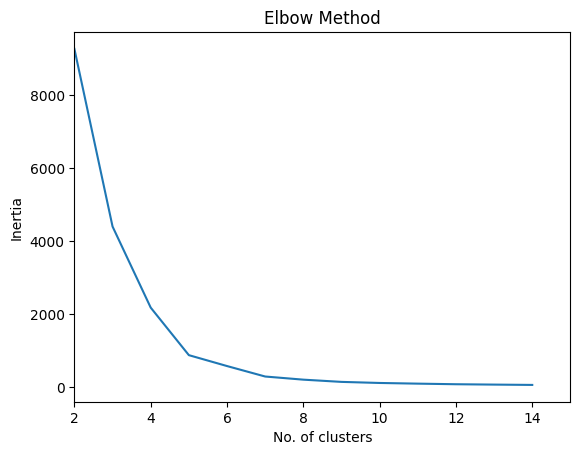

In [ ]:
#plot the clusters vs inertia
plt.plot(clusters.keys(), inertia)
plt.xlim([2,15])
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Optimal cluster at 5, so choosing centroids
centroids_optimal= centroids[6]
clusters_optimal= clusters[6]

In [ ]:
centroids_optimal

array([[ 3.98934257e-02,  1.79006883e-02,  8.42299270e-02,
         1.22463916e+00],
       [ 1.54464327e-02,  3.05795671e-03, -1.43155926e+00,
        -6.06198494e-01],
       [ 6.24695506e+01,  6.46394149e+01,  8.42299270e-02,
         1.22463916e+00],
       [-6.67280381e-02, -4.63387680e-02,  8.42299270e-02,
        -1.21647771e+00],
       [-9.12429344e-02, -6.13944349e-02,  1.60001911e+00,
        -6.06198494e-01],
       [-9.84512503e-02, -6.58595867e-02,  1.60001911e+00,
         6.14359941e-01]])

In [ ]:
len(centroids_optimal)

6

In [ ]:
clusters_optimal

array([5, 3, 0, ..., 1, 0, 0], dtype=int32)

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


After fitting, dbscan.labels_ contains the cluster assignments for each data point in X_train. These labels are stored in the db_labels variable. Each data point gets assigned a cluster number. Points labeled as -1 are considered noise (outliers). This line prints the unique cluster labels found by DBSCAN. This helps to see how many clusters were identified and whether any noise points were detected.

In [ ]:
# YOUR CODE HERE
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps= 0.24, min_samples= 7)
dbscan.fit(X_train)
db_labels= dbscan.labels_
print("Unique clusters in data: ", np.unique(db_labels))

Unique clusters in data:  [-1  0  1  2  3  4]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

Okay, let's break down this code snippet.

This section of the code is responsible for creating a 2D scatter plot to visualize the customer clusters generated by the K-Means algorithm. It uses the matplotlib.pyplot library, aliased as plt, for plotting.

Here's a step-by-step explanation:

plt.scatter(...): This function is called multiple times to plot the data points for each cluster.

X[clusters_optimal == 0, 0] and X[clusters_optimal == 0, 1]: These expressions select the data points belonging to cluster 0. clusters_optimal stores the cluster assignments for each data point, and X contains the feature values. [:, 0] selects the first feature (Quantity) and [:, 1] selects the second feature (TotalSpend).
c = 'red', label = 'cluster 1': These arguments set the color and label for the points in cluster 0.
This process is repeated for clusters 1 through 5, using different colors and labels.
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s = 100, c = 'yellow', label = 'Centroids'): This line plots the cluster centroids.

centroids_optimal[:, 0] and centroids_optimal[:, 1] select the coordinates of the centroids.
s = 100 sets the size of the centroid markers.
c = 'yellow' sets the color of the centroid markers.
label = 'Centroids' sets the label for the centroids.
plt.title('Clusters of customers'): Sets the title of the plot.

plt.xlabel('Quantity'): Sets the label for the x-axis.

plt.ylabel('TotalSpend'): Sets the label for the y-axis.

plt.legend(): Displays a legend to identify the different clusters and centroids.

plt.show(): Renders the plot.

In simpler terms:

The code takes the customer data, which has been clustered into 6 groups, and creates a scatter plot where each point represents a customer. Customers in the same cluster are plotted with the same color. The center of each cluster is also marked. The plot uses 'Quantity' and 'TotalSpend' as the axes, allowing you to visually see how customers are grouped based on these two characteristics. This visualization helps to understand the buying patterns of different customer segments.

In [ ]:
X_train[clusters_optimal== 0,1]

array([-0.05901745, -0.01808489, -0.07641167, ..., -0.08649994,
        0.0206935 , -0.00560712])

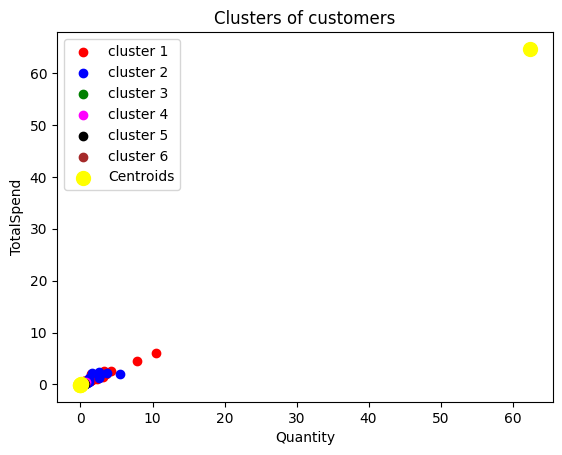

In [ ]:
plt.scatter(X_train[clusters_optimal == 0, 0], X_train[clusters_optimal == 0, 1], c = 'red', label = 'cluster 1')
plt.scatter(X_train[clusters_optimal == 1, 0], X_train[clusters_optimal == 1, 1], c = 'blue', label = 'cluster 2')
plt.scatter(X_train[clusters_optimal == 2, 0], X_train[clusters_optimal == 2, 1], c = 'green', label = 'cluster 3')
plt.scatter(X_train[clusters_optimal == 3, 0], X_train[clusters_optimal == 3, 1], c = 'magenta', label = 'cluster 4')
plt.scatter(X_train[clusters_optimal == 4, 0], X_train[clusters_optimal == 4, 1], c = 'k', label = 'cluster 5')
plt.scatter(X_train[clusters_optimal == 5, 0], X_train[clusters_optimal == 5, 1], c = 'brown', label = 'cluster 6')
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('TotalSpend')
plt.legend()
plt.show()

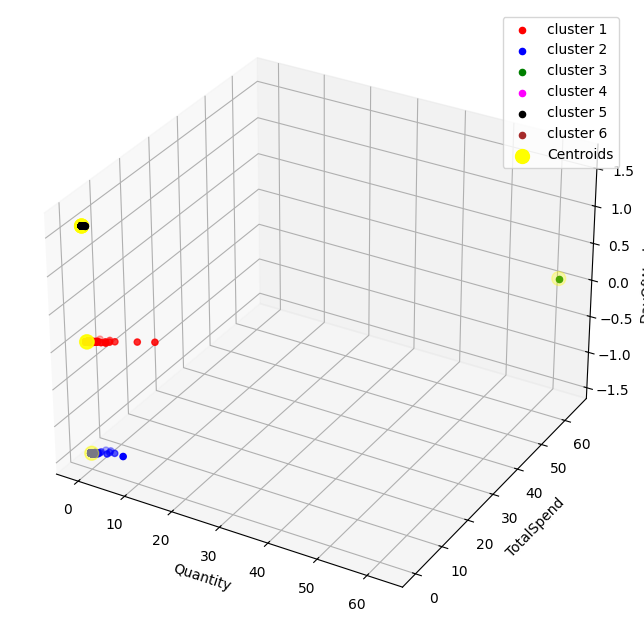

In [ ]:
# Visualising all the clusters in 3D using `TotalSpend`, `Quantity`, `DayOfWeek_sin`

fig= plt.figure(figsize= (10,8))
ax= plt.axes(projection= '3d')
ax.scatter(X_train[clusters_optimal == 0, 0], X_train[clusters_optimal == 0, 1], X_train[clusters_optimal == 0, 2], c= 'red', label= 'cluster 1')
ax.scatter(X_train[clusters_optimal == 1, 0], X_train[clusters_optimal == 1, 1], X_train[clusters_optimal == 1, 2], c = 'blue', label = 'cluster 2')
ax.scatter(X_train[clusters_optimal == 2, 0], X_train[clusters_optimal == 2, 1], X_train[clusters_optimal == 2, 2], c = 'green', label = 'cluster 3')
ax.scatter(X_train[clusters_optimal == 3, 0], X_train[clusters_optimal == 3, 1], X_train[clusters_optimal == 3, 2], c = 'magenta', label = 'cluster 4')
ax.scatter(X_train[clusters_optimal == 4, 0], X_train[clusters_optimal == 4, 1], X_train[clusters_optimal == 4, 2], c = 'k', label = 'cluster 5')
ax.scatter(X_train[clusters_optimal == 5, 0], X_train[clusters_optimal == 5, 1], X_train[clusters_optimal == 5, 2], c = 'brown', label = 'cluster 6')
ax.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], centroids_optimal[:, 2], s= 100, c = 'yellow', label = 'Centroids')
ax.set_xlabel("Quantity")
ax.set_ylabel("TotalSpend")
ax.set_zlabel("DayOfWeek_cos")
ax.legend()
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
# YOUR CODE HERE
customer_train_grouped_df.head()

,CustomerID,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,12346.0,26,27.04,8.660254e-01,0.5
1,12347.0,2052,3672.86,1.224647e-16,-1.0
2,12348.0,669,543.77,-2.449294e-16,1.0
3,12349.0,591,1258.61,0.000000e+00,1.0
4,12350.0,197,302.85,8.660254e-01,-0.5


In [ ]:
clusters_optimal

array([5, 3, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
customer_train_grouped_df['Label']= clusters_optimal
customer_train_grouped_df.head()

,CustomerID,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos,Label
0,12346.0,26,27.04,8.660254e-01,0.5,5
1,12347.0,2052,3672.86,1.224647e-16,-1.0,3
2,12348.0,669,543.77,-2.449294e-16,1.0,0
3,12349.0,591,1258.61,0.000000e+00,1.0,0
4,12350.0,197,302.85,8.660254e-01,-0.5,4


In [ ]:
features= customer_train_grouped_df.iloc[:,1:-1]
labels= customer_train_grouped_df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size= .20, random_state= 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3469, 4), (868, 4), (3469,), (868,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

1.0

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
customer_test_grouped_df.head()

,CustomerID,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,12347.0,105.5,217.925,1.224647e-16,-1.0
1,12348.0,23.5,6.815,8.660254e-01,0.5
2,12349.0,20.0,104.940,0.000000e+00,1.0
3,12352.0,1.0,8.450,8.660254e-01,0.5
4,12353.0,6.0,50.700,1.224647e-16,-1.0


In [ ]:
# YOUR CODE HERE
test= customer_test_grouped_df.iloc[:,1:]
test.head()

,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,105.5,217.925,1.224647e-16,-1.0
1,23.5,6.815,8.660254e-01,0.5
2,20.0,104.940,0.000000e+00,1.0
3,1.0,8.450,8.660254e-01,0.5
4,6.0,50.700,1.224647e-16,-1.0


In [ ]:
test_features= pd.DataFrame(scaler.transform(test), columns= test.columns)
test_features.head()

,Quantity,Total Amount Spent,DayOfWeekSin,DayOfWeekCos
0,-0.125621,-0.077676,0.084230,-1.216478
1,-0.140542,-0.089764,1.600019,0.614360
2,-0.141179,-0.084145,0.084230,1.224639
3,-0.144636,-0.089670,1.600019,0.614360
4,-0.143726,-0.087251,0.084230,-1.216478


In [ ]:
rf.predict(test)

array([3, 5, 0, ..., 1, 3, 0], dtype=int32)

In [ ]:
rf.predict(test_features)

array([3, 5, 0, ..., 1, 3, 0], dtype=int32)

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?